In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from helper_utils.utils import *

In [2]:
# LOAD DATA

data_directory = "processed_data"
data_filename_base = "X_top300_201701_201912_30_m"
data_filename_ext = ".npy"
data_filename = data_filename_base+data_filename_ext

X_raw = np.load(os.path.join(data_directory, data_filename))

Smoothing filter =  [0.01321289 0.26538793 0.72139918]


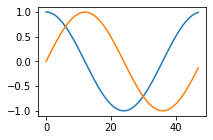

In [3]:
# SMOOTH DATA and ADD TIME INFO

filter_size, filter_type, var = 3, 'gaussian', 1
periods = [2*24,]
num_time_features = max(len(periods),1)

X_raw[:,:,:2] = smooth_counts(X_raw[:,:,:2], filter_size=filter_size, filter_type=filter_type, var=var)
X_raw = add_time_information(X_raw, periods, keep_original_time=False)

plt.figure(figsize=(3,2))
plt.plot(X_raw[0,:48,-1])
plt.plot(X_raw[0,:48,-2])

In [4]:
X_raw[150, 0:5]

array([[0.72139918, 0.        , 0.        , 1.        ],
       [0.26538793, 0.        , 0.13052619, 0.99144486],
       [0.01321289, 0.        , 0.25881905, 0.96592583],
       [0.        , 0.        , 0.38268343, 0.92387953],
       [2.16419755, 0.        , 0.5       , 0.8660254 ]])

In [5]:
# TRAIN-TEST SPLIT

data_final = {}

window_length = 10
train_pct, valid_pct, test_pct = 0.5, 0.6, 0.8
drop_y_time = True

X, y = make_windows(X_raw, window_length=window_length)

if drop_y_time:
    y = y[:,:,:,:2]

NUM_SAMPLES = len(X)
TRAIN_SAMPLES = int(train_pct*NUM_SAMPLES)
VALID_SAMPLES = int(valid_pct*NUM_SAMPLES)
TEST_SAMPLES = int(test_pct*NUM_SAMPLES)

data_final["X_train"], data_final["y_train"] = X[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
data_final["X_val"], data_final["y_val"] = X[TRAIN_SAMPLES:VALID_SAMPLES], y[TRAIN_SAMPLES:VALID_SAMPLES]
data_final["X_test"], data_final["y_test"] = X[VALID_SAMPLES:TEST_SAMPLES], y[VALID_SAMPLES:TEST_SAMPLES]

''''
input_shape = tuple(list(X_train.shape)[1:])
output_shape = tuple(list(y_train.shape)[1:])
input_dims = np.product(input_shape)
output_dims = np.product(output_shape)

num_nodes, num_steps, input_features = input_shape
_, _, output_features = output_shape
'''

"'\ninput_shape = tuple(list(X_train.shape)[1:])\noutput_shape = tuple(list(y_train.shape)[1:])\ninput_dims = np.product(input_shape)\noutput_dims = np.product(output_shape)\n\nnum_nodes, num_steps, input_features = input_shape\n_, _, output_features = output_shape\n"

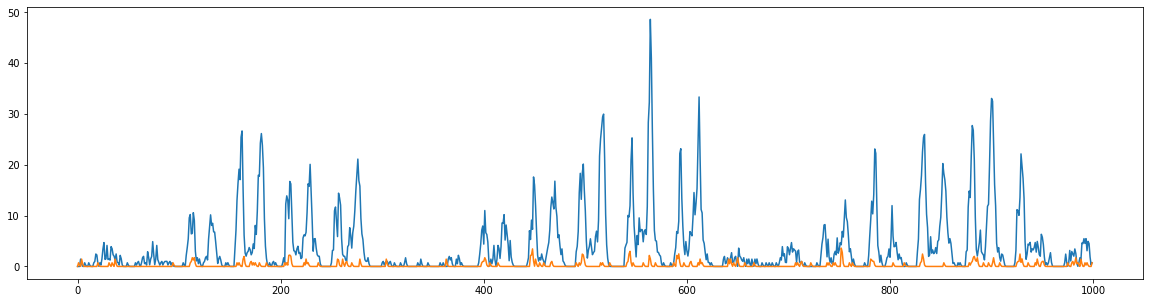

In [6]:
# EXAMPLE PLOT
plt.figure(figsize=(20,5))
plt.plot(X_raw[0,:1000,0])
plt.plot(X_raw[-1,:1000,0])

In [7]:
np.savez(os.path.join(data_directory, data_filename_base+"_final.npz"), **data_final)